# Housing Notebook

## Business Problem 

We have been hired by the Danielson family to help find them an affordable home in King County Washington. In the data frame we analyzed, there were over 20,000 homes to choose from. Our job is to make it easier for them to find a house in King County. We made several regression models to find a strong correlation with price and plugged in different variables to find the best way to predict the price on the house. Our target price is to find a home around \\$450,000 and it will need to have 3 to 5 bedrooms. We filtered our data we ran in our model to only look at houses with 3 to 5 bedrooms so that our model does not have to go through over 20,000 pieces of data. 

## Data Understanding 

We pulled our information from a data frame that had all the houses in King County Washington. Since we were looking to find a home for a family of four, we filtered our data to only look at houses that had 3 to 5 bedrooms. The data set described many features of the house, but we were only interested in variables that affected a house's price. The variables that we focused on were bedrooms, bathrooms, grade, square feet of living space, square feet of living space, square feet above the first floor, house age, and zipcode. One of the limitations on our model is that it is inaccurate when predicting price on homes that have bedrooms outside the range of 3 to 5. 

## Imports and Collecting Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler

We collected data from all the houses located in King County

In [2]:
df = pd.read_csv('data/kc_house_data.csv')

We wanted to add a column for house_age to make it easier for our model to see if there was a correlation to the price instead of trying to use the yr_built colmun. 

In [3]:
house_age = 2015 - df['yr_built']
df['house_age'] = house_age
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,house_age
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,60
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,64
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,82
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,50
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,6
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,1
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,6
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,11


My colleague Connor gave me the inspiration to write the following map code. This map code makes it easier to navigate the grade column in our data frame by making it only a number and not having descriptive words like Average or Above Average. 

In [4]:
map_cond = {
    'Poor' : -2, 
    'Fair' : -1, 
    'Average' : 0, 
    'Good' : 1, 
    'Very Good' : 2
}

In [5]:
map_grade = {
    '3 Poor' : -4, 
    '4 Low' : -3, 
    '5 Fair' : -2,
    '6 Low Average' : -1, 
    '7 Average' : 0, 
    '8 Good' : 1, 
    '9 Better' : 2, 
    '10 Very Good' : 3, 
    '11 Excellent' : 4, 
    '12 Luxury' : 5, 
    '13 Mansion' : 6
}

In [6]:
map_view = {
    'NONE' : -2, 
    'FAIR' : -1,
    'AVERAGE' : 0, 
    'GOOD' : 1, 
    'EXCELLENT' : 2
}

In [7]:
map_water = {
    'NO' : 0, 
    'YES' : 1
}

In [8]:
df['condition'] = df['condition'].map(map_cond)
df['grade'] = df['grade'].map(map_grade) 
df['view'] = df['view'].map(map_view) 
df['waterfront'] = df['waterfront'].map(map_water)

In [9]:
df.sort_values(['price'], ascending = True)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,house_age
15279,40000362,5/6/2014,78000.0,2,1.00,780,16344,1.0,0.0,-2.0,...,780,0.0,1942,NaN,98168,47.4739,-122.280,1700,10387,73
465,8658300340,5/23/2014,80000.0,1,0.75,430,5050,1.0,NaN,-2.0,...,430,0.0,1912,0.0,98014,47.6499,-121.909,1200,7500,103
16184,3028200080,3/24/2015,81000.0,2,1.00,730,9975,1.0,NaN,-2.0,...,730,0.0,1943,0.0,98168,47.4808,-122.315,860,9000,72
8267,3883800011,11/5/2014,82000.0,3,1.00,860,10426,1.0,0.0,-2.0,...,860,0.0,1954,0.0,98146,47.4987,-122.341,1140,11250,61
2139,1623049041,5/8/2014,82500.0,2,1.00,520,22334,1.0,0.0,-2.0,...,520,0.0,1951,0.0,98168,47.4799,-122.296,1572,10570,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0.0,2.0,...,6720,1280.0,2009,0.0,98004,47.6232,-122.220,4600,21750,6
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0.0,-2.0,...,6200,3000.0,2001,NaN,98039,47.6289,-122.233,3560,24345,14
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0.0,2.0,...,8860,1030.0,2001,0.0,98039,47.6305,-122.240,4540,42730,14
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1.0,0.0,...,7680,2360.0,1940,2001.0,98004,47.6500,-122.214,3930,25449,75


We wanted to find the median price of houses in the data frame because the average was affected by the outliers of higher priced mansions. This median will serve as the target price for the homes we want our family of four to look at. 

In [10]:
df['price'].median()

450000.0

We filtered our data to show homes that have 3 to 5 bedrooms because we are trying to recommend homes for families of four. 

In [11]:
df_bedroom_filter = df.loc[(df['bedrooms'] >= 3) & (df['bedrooms'] <= 5)]
df_bedroom_filter['bedrooms'].value_counts()


3    9824
4    6882
5    1601
Name: bedrooms, dtype: int64

In [12]:
df_bedroom_filter.sort_values(['price'],  ascending = False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,house_age
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1.0,0.0,...,7680,2360.0,1940,2001.0,98004,47.6500,-122.214,3930,25449,75
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0.0,-2.0,...,6200,3000.0,2001,NaN,98039,47.6289,-122.233,3560,24345,14
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0.0,2.0,...,6720,1280.0,2009,0.0,98004,47.6232,-122.220,4600,21750,6
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1.0,2.0,...,5990,2020.0,1999,0.0,98033,47.6767,-122.211,3430,26788,16
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1.0,2.0,...,4820,4820.0,1983,2009.0,98040,47.5570,-122.210,3270,10454,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5718,1788800630,10/29/2014,96500.0,3,1.00,840,12091,1.0,NaN,-2.0,...,840,0.0,1959,0.0,98023,47.3281,-122.343,840,9324,56
18924,4239400300,11/29/2014,90000.0,3,1.00,980,2490,2.0,0.0,-2.0,...,980,0.0,1969,0.0,98092,47.3170,-122.182,980,3154,46
5860,9320900420,10/14/2014,89000.0,3,1.00,900,4750,1.0,0.0,-2.0,...,900,0.0,1969,0.0,98023,47.3026,-122.363,900,3404,46
13743,1788900230,7/22/2014,86500.0,3,1.00,840,9480,1.0,0.0,-2.0,...,840,0.0,1960,0.0,98023,47.3277,-122.341,840,9420,55


## Intro to Model 1

We ran our first model on the correlation of price and the number of bathrooms in the house. 

In [13]:
y = df_bedroom_filter['price']
X = df_bedroom_filter['bathrooms']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [15]:
shitty_model = sm.OLS(y, sm.add_constant(X)).fit()
shitty_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                     6616.
Date:                Fri, 01 Jul 2022   Prob (F-statistic):               0.00
Time:                        13:42:38   Log-Likelihood:            -2.5783e+05
No. Observations:               18307   AIC:                         5.157e+05
Df Residuals:                   18305   BIC:                         5.157e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -3.22e+04   7623.113     -4.224      0.000   -4.71e+04   -1.73e+04
bathrooms   2.664e+05   3275.331     81.339      0.000     2.6e+05    2.73e+05
==============================================================================
Omnibus:                    13059.982   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414503.812
Skew:                           3.052   Prob(JB):                         0.00
Kurtosis:                      25.498   Cond. No.                         8.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Our first model did poorly. The r2 score is extremely low which makes it unreliable. However, the coefficient for bathrooms shows that the number of bathrooms has a significant influence on the price of homes. 

<AxesSubplot:>

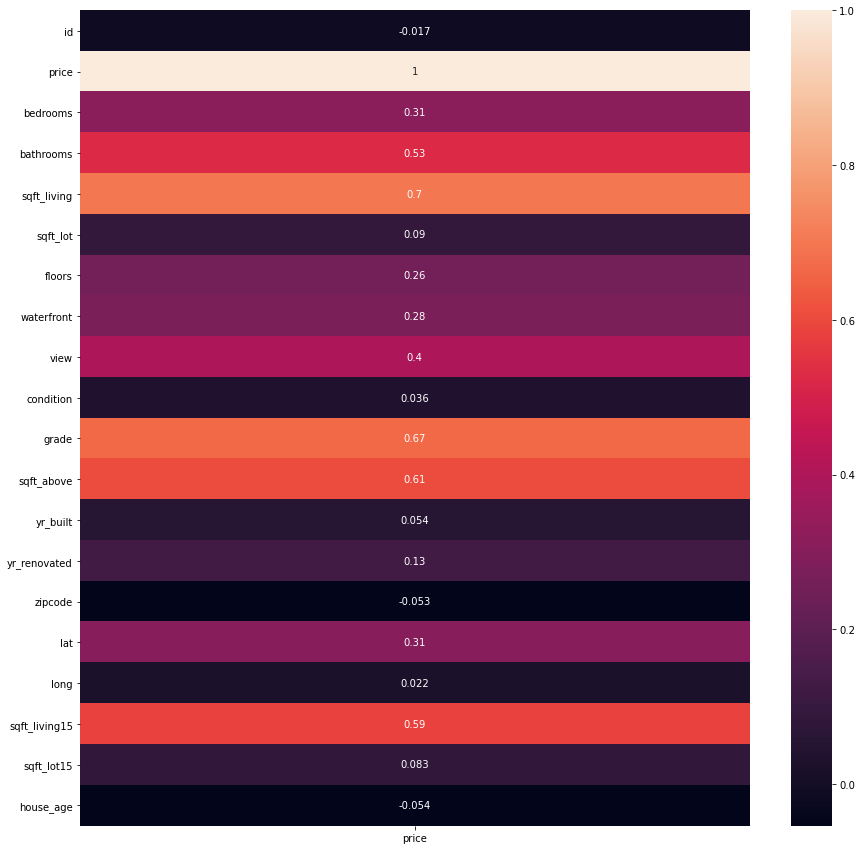

In [16]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr()[['price']], annot=True)

We ran a heatmap to find the variables with the highest correlation with price. The variables we wanted to focus on are bathrooms, bedrooms, square feet of living, grade, square feet of the 15 houses nearby, and square feet above the first floor. 

## Intro to Model 2

In [17]:
y_2 = df_bedroom_filter['price'] 
X_2 = df_bedroom_filter[['bedrooms', 'bathrooms', 'grade', 
                         'sqft_living', 'sqft_living15', 'sqft_above']]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.33, random_state=42)

In [19]:
model_2 = sm.OLS(y_train, sm.add_constant(X_train)).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     2496.
Date:                Fri, 01 Jul 2022   Prob (F-statistic):               0.00
Time:                        13:42:38   Log-Likelihood:            -1.6974e+05
No. Observations:               12265   AIC:                         3.395e+05
Df Residuals:                   12258   BIC:                         3.395e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.448e+05   1.46e+04      9.920      0.000    1.16e+05    1.73e+05
bedrooms      -2.035e+04   4054.843     -5.020      0.000   -2.83e+04   -1.24e+04
bathrooms     -2.062e+04   4643.881     -4.441      0.000   -2.97e+04   -1.15e+04
grade           1.18e+05   3438.096     34.326      0.000    1.11e+05    1.25e+05
sqft_living     270.6179      6.247     43.317      0.000     258.372     282.864
sqft_living15    13.5353      5.353      2.528      0.011       3.042      24.029
sqft_above      -98.3141      5.719    -17.190      0.000    -109.525     -87.103
==============================================================================
Omnibus:                     8784.059   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           378070.919
Skew:                           2.951   Prob(JB):                         0.00
Kurtosis:                      29.551   Cond. No.                     2.52e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.52e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Our Model_2 did much better than our first model, but it still has a relatively low r2 score of .550. Looking at the coefficients, grade has the highest correlation to price. There is a negative correlation with price when it comes to bedrooms and bathrooms. The explanation behind this is that houses closer to the city's center are more compact and will have less space for multiple bedrooms and bathrooms. However, the price will still be high because of its location in the city. 

The following code is from lesson 16. 

In [20]:
lr_base = LinearRegression()
lr_base.fit(X_train, y_train)

LinearRegression()

In [21]:
train_preds = lr_base.predict(X_train)
test_preds = lr_base.predict(X_test)

In [22]:
print(f"Train R2 Score: {r2_score(y_train, train_preds):.4f}")
print(f"Train MAE Score: ${mean_absolute_error(y_train, train_preds):.4f}")
print(f"Train RMSE Score: ${mean_squared_error(y_train, train_preds, squared=False):.4f}")
print("*"*20)
print(f"Test R2 Score: {r2_score(y_test, test_preds):.4f}")
print(f"Test MAE Score: ${mean_absolute_error(y_test, test_preds):.4f}")
print(f"Test RMSE Score: ${mean_squared_error(y_test, test_preds, squared=False):.4f}")

Train R2 Score: 0.5499
Train MAE Score: $162312.7752
Train RMSE Score: $247773.1910
********************
Test R2 Score: 0.5505
Test MAE Score: $162742.1535
Test RMSE Score: $247363.6307


The root mean square error shows us that our model is off by about 247,000 dollars when making predictions on our best fit line. The mean absolute error gives our model the standard deviation from how far off our predictions are from the actual value. In this case, our mean absolute error is about 160,000 dollars.

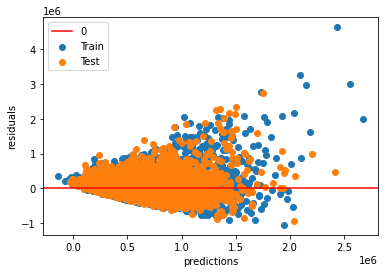

In [23]:
plt.scatter(train_preds, y_train-train_preds, label='Train')
plt.scatter(test_preds, y_test-test_preds, label='Test')

plt.axhline(y=0, color = 'red', label = '0')
plt.xlabel('predictions')
plt.ylabel('residuals')
plt.legend()
plt.show()

This graph shows how accurate our model is at predicting house prices with the given variables we plugged in. Our model does well predicting lower home prices, but the error increases as it predicts higher home prices.

## Intro to Model_3

We dropped sqft_lot because it did not have a strong correlation with price. We also wanted to see if house_age had any correlation to price.

In [24]:
y_3 = df_bedroom_filter['price']
X_3 = df_bedroom_filter[['bedrooms', 'bathrooms', 'grade', 'sqft_living', 
            'sqft_living15', 'sqft_above', 'house_age']]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_3, y_3, test_size=0.33, random_state=42)

In [26]:
model_3 = sm.OLS(y_train, sm.add_constant(X_train)).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     2815.
Date:                Fri, 01 Jul 2022   Prob (F-statistic):               0.00
Time:                        13:42:39   Log-Likelihood:            -1.6876e+05
No. Observations:               12265   AIC:                         3.375e+05
Df Residuals:                   12257   BIC:                         3.376e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.491e+05   1.49e+04    -10.003      0.000   -1.78e+05    -1.2e+05
bedrooms      -3.443e+04   3755.185     -9.168      0.000   -4.18e+04   -2.71e+04
bathrooms      6.559e+04   4675.822     14.028      0.000    5.64e+04    7.48e+04
grade          1.353e+05   3195.518     42.340      0.000    1.29e+05    1.42e+05
sqft_living     179.6864      6.094     29.486      0.000     167.741     191.631
sqft_living15    25.1230      4.948      5.078      0.000      15.425      34.821
sqft_above      -23.8382      5.520     -4.318      0.000     -34.659     -13.018
house_age      4247.4199     92.026     46.155      0.000    4067.035    4427.805
==============================================================================
Omnibus:                     9390.634   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           560390.884
Skew:                           3.159   Prob(JB):                         0.00
Kurtosis:                      35.506   Cond. No.                     2.78e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.78e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We added in house_age because we wanted to see if there was a correlation with price, and our Model_3 did better than our last with a higher r2 score of .617. When we add in house_age, the correlation for bathrooms goes from negative to a very strong positive correlation. The coefficient for house_age shows that it has a positive correlation with price. 

The following code is from lesson 16. 

In [27]:
lr_base = LinearRegression()
lr_base.fit(X_train, y_train)

LinearRegression()

In [28]:
train_preds = lr_base.predict(X_train)
test_preds = lr_base.predict(X_test)

In [29]:
print(f"Train R2 Score: {r2_score(y_train, train_preds):.4f}")
print(f"Train MAE Score: ${mean_absolute_error(y_train, train_preds):.4f}")
print(f"Train RMSE Score: ${mean_squared_error(y_train, train_preds, squared=False):.4f}")
print("*"*20)
print(f"Test R2 Score: {r2_score(y_test, test_preds):.4f}")
print(f"Test MAE Score: ${mean_absolute_error(y_test, test_preds):.4f}")
print(f"Test RMSE Score: ${mean_squared_error(y_test, test_preds, squared=False):.4f}")

Train R2 Score: 0.6165
Train MAE Score: $147827.2453
Train RMSE Score: $228695.3981
********************
Test R2 Score: 0.6148
Test MAE Score: $147745.2526
Test RMSE Score: $228982.8543


Our MAE and RMSE improved by around 20,000 after adding in house_age and dropping sqft_lot, but we still want to get our MAE and RMSE down to a smaller number to improve our accuracy on making predictions. 

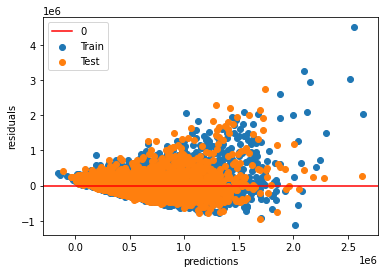

In [30]:
plt.scatter(train_preds, y_train-train_preds, label='Train')
plt.scatter(test_preds, y_test-test_preds, label='Test')

plt.axhline(y=0, color = 'red', label = '0')
plt.xlabel('predictions')
plt.ylabel('residuals')
plt.legend()
plt.show()

Like our previous model, it is accurate at predicting lower priced homes but increases in error as price increases. The residuals are similar when we run testing and training data through the model. This suggests that our model is performing well on data it has not seen.

## Intro to Model_4

For our Model_4, we decided to add in zipcode to see if it had any correlation to price. 

In [31]:
y_4 = df_bedroom_filter['price']
X_4 = df_bedroom_filter[['bedrooms', 'bathrooms', 'grade', 'sqft_living', 
            'sqft_living15', 'sqft_above', 'house_age', 'zipcode']]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_4, y_4, 
                                                    test_size=0.33, 
                                                    random_state=42)

The following code is from lesson 15.

In [33]:
encoder = OneHotEncoder(handle_unknown='error',
                        drop='first',
                        categories='auto')

ct = ColumnTransformer(transformers=[('ohe', encoder, ['zipcode'])],
                       remainder='passthrough', sparse_threshold=0)
ct.fit(X_train)
X_train_enc = pd.DataFrame(ct.transform(X_train), columns=ct.get_feature_names())
X_test_enc = pd.DataFrame(ct.transform(X_test), columns=ct.get_feature_names())

We One Hot Encoded the zipcodes so that it made different columns for each zipcode so that we could easily run it through our model to find a correlation for price. 

In [34]:
scaler = MinMaxScaler()

scaler.fit(X_train_enc)

X_train_scaled = pd.DataFrame(scaler.transform(X_train_enc), columns=X_train_enc.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test_enc), columns=X_train_enc.columns)

In [35]:
lr_ohe = LinearRegression()
lr_ohe.fit(X_train_scaled, y_train)

train_preds = lr_ohe.predict(X_train_scaled)
test_preds = lr_ohe.predict(X_test_scaled)

In [36]:
print(f"Train R2 Score: {r2_score(y_train, train_preds):.3f}")
print(f"Test R2 Score: {r2_score(y_test, test_preds):.3f}")

Train R2 Score: 0.766
Test R2 Score: 0.770


In [37]:
X_train_scaled.index = y_train.index

In [38]:
model_4 = sm.OLS(y_train, sm.add_constant(X_train_scaled)).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     525.6
Date:                Fri, 01 Jul 2022   Prob (F-statistic):               0.00
Time:                        13:42:39   Log-Likelihood:            -1.6572e+05
No. Observations:               12265   AIC:                         3.316e+05
Df Residuals:                   12188   BIC:                         3.322e+05
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.648e+05   1.46e+04    -24.912      0.000   -3.93e+05   -3.36e+05
ohe__x0_98002  5.461e+04   2.01e+04      2.719      0.007    1.52e+04     9.4e+04
ohe__x0_98003 -5659.9166   1.78e+04     -0.318      0.751   -4.06e+04    2.93e+04
ohe__x0_98004  7.568e+05   1.78e+04     42.563      0.000    7.22e+05    7.92e+05
ohe__x0_98005  2.852e+05   2.08e+04     13.730      0.000    2.44e+05    3.26e+05
ohe__x0_98006  2.674e+05   1.59e+04     16.854      0.000    2.36e+05    2.99e+05
ohe__x0_98007  2.135e+05   2.37e+04      9.019      0.000    1.67e+05     2.6e+05
ohe__x0_98008  2.725e+05    1.8e+04     15.179      0.000    2.37e+05    3.08e+05
ohe__x0_98010  6.283e+04   2.67e+04      2.350      0.019    1.04e+04    1.15e+05
ohe__x0_98011   1.02e+05   1.97e+04      5.175      0.000    6.34e+04    1.41e+05
ohe__x0_98014  9.053e+04    2.4e+04      3.771      0.000    4.35e+04    1.38e+05
ohe__x0_98019  8.402e+04   2.07e+04      4.059      0.000    4.35e+04    1.25e+05
ohe__x0_98022  3.009e+04   1.94e+04      1.553      0.121   -7895.783    6.81e+04
ohe__x0_98023  -2.88e+04   1.55e+04     -1.852      0.064   -5.93e+04    1676.154
ohe__x0_98024   1.73e+05   2.85e+04      6.074      0.000    1.17e+05    2.29e+05
ohe__x0_98027  1.625e+05   1.66e+04      9.777      0.000     1.3e+05    1.95e+05
ohe__x0_98028   1.06e+05   1.82e+04      5.816      0.000    7.03e+04    1.42e+05
ohe__x0_98029  1.804e+05   1.75e+04     10.291      0.000    1.46e+05    2.15e+05
ohe__x0_98030  7517.1552   1.82e+04      0.412      0.680   -2.82e+04    4.33e+04
ohe__x0_98031  1.936e+04   1.79e+04      1.081      0.280   -1.57e+04    5.45e+04
ohe__x0_98032 -1.213e+04   2.42e+04     -0.500      0.617   -5.97e+04    3.54e+04
ohe__x0_98033  3.637e+05   1.63e+04     22.324      0.000    3.32e+05    3.96e+05
ohe__x0_98034  2.169e+05   1.53e+04     14.151      0.000    1.87e+05    2.47e+05
ohe__x0_98038  2.831e+04    1.5e+04      1.885      0.059   -1124.142    5.77e+04
ohe__x0_98039  1.216e+06   3.28e+04     37.021      0.000    1.15e+06    1.28e+06
ohe__x0_98040   4.95e+05   1.81e+04     27.342      0.000    4.59e+05     5.3e+05
ohe__x0_98042  9418.0320   1.51e+04      0.622      0.534   -2.03e+04    3.91e+04
ohe__x0_98045  1.022e+05   1.97e+04      5.190      0.000    6.36e+04    1.41e+05
ohe__x0_98052  2.147e+05   1.52e+04     14.098      0.000    1.85e+05    2.45e+05
ohe__x0_98053  1.695e+05   1.73e+04      9.780      0.000    1.36e+05    2.03e+05
ohe__x0_98055  2.723e+04   1.95e+04      1.400      0.162   -1.09e+04    6.54e+04
ohe__x0_98056  1.056e+05   1.67e+04      6.332      0.000    7.29e+04    1.38e+05
ohe__x0_98058  2.231e+04   1.57e+04      1.417      0.156   -8550.908    5.32e+04
ohe__x0_98059   7.65e+04   1.58e+04      4.853      0.000    4.56e+04    1.07e+05
ohe__x0_98065  8.265e+04   1.81e+04      4.555   

Our Model_4 r2 score jumped up to .766 which proves our model is reliable in making predictions. The two most important features in our model are zipcodes and sqft_living. All the zipcodes' coefficients show a strong correlation when it comes to price. The houses in the zipcodes with the strongest correlation to price were in 98039, 98075, and 98040.

The following code is from lesson 16.

In [39]:
print(f"Train R2 Score: {r2_score(y_train, train_preds):.4f}")
print(f"Train MAE Score: ${mean_absolute_error(y_train, train_preds):.4f}")
print(f"Train RMSE Score: ${mean_squared_error(y_train, train_preds, squared=False):.4f}")
print("*"*20)
print(f"Test R2 Score: {r2_score(y_test, test_preds):.4f}")
print(f"Test MAE Score: ${mean_absolute_error(y_test, test_preds):.4f}")
print(f"Test RMSE Score: ${mean_squared_error(y_test, test_preds, squared=False):.4f}")

Train R2 Score: 0.7662
Train MAE Score: $104886.1861
Train RMSE Score: $178565.7381
********************
Test R2 Score: 0.7698
Test MAE Score: $104993.7695
Test RMSE Score: $177007.1134


Our MAE and RMSE saw massive improvement in Model_4 and dropped to about 105,000 dollars for the MAE and 177,000 dollars for the RMSE. 

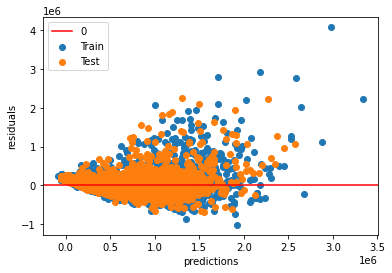

In [40]:
plt.scatter(train_preds, y_train-train_preds, label='Train')
plt.scatter(test_preds, y_test-test_preds, label='Test')

plt.axhline(y=0, color = 'red', label = '0')
plt.xlabel('predictions')
plt.ylabel('residuals')
plt.legend()
plt.show()

All of our models perform relatively similar based on the visuals. However, we relied on specific metrics (r2, RMSE, MAE, and Coefficients) to determine how accurate our model was. 

## Conclusion

In Model_4, we ran a regression model to find a correlation between price and bedrooms, bathrooms, grade, sqft_living, sqft_living15, sqft_above, house_age, and zipcode and created a reliable model with a r2 score of .766. The strongest indicators of price are sqft_living and zipcodes. We filtered our data by only looking at houses with 3 to 5 bedrooms because our target market is towards a family of four. The Danielson family can look at our Model_4 and be able to accurately predict the price of the house. We recommed that the Danielson family look to purchase homes within the zipcodes of 98118 (AVG price: \\$444,409), 98045 (AVG price: \\$449,778), 98155 (AVG price: \\$444,049). These zipcodes also have similar average amounts of living space: 98118 (1,871 sqft_living), 98045 (2,141 sqft_living), and 98155 (1,907 sqft_living). 